In [1]:
import pyreadr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
result = pyreadr.read_r('.\Topsail_hab.rds')

In [3]:
df = result[None]
df['Habitat'].value_counts()
# 1) Nonwetland
# 2) Nonwetland Open
# 3) PFO/SS
# 4) PFO
# 5) PSS

1.0    26
3.0    17
2.0    17
4.0    15
6.0    15
Name: Habitat, dtype: int64

In [4]:
df['Wetland'] = np.where(np.logical_or(df['Habitat']==1.0, df['Habitat']==2.0), 0, 1)
df['Wetland'].value_counts()

1    47
0    43
Name: Wetland, dtype: int64

<AxesSubplot:>

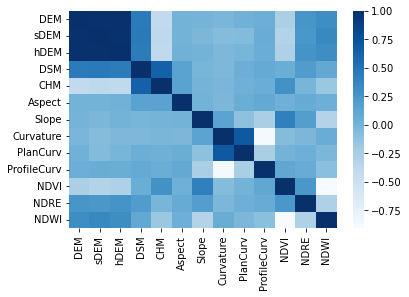

In [5]:
df_corr = df.drop(["Wetland", "Habitat", 'x', 'y'], axis=1)
corr = df_corr.corr()
sns.heatmap(corr, cmap="Blues")

In [6]:
wetland_corr = df.drop(['Habitat', 'x', 'y'], axis=1).corr()
df_corr = pd.DataFrame(wetland_corr['Wetland'])
df_corr = df_corr[:-1].sort_values(by=["Wetland"])
pd.set_option('display.max_rows', None)
df_corr

,Wetland
NDWI,-0.433454
sDEM,-0.094704
hDEM,-0.065176
Curvature,-0.057515
DEM,-0.053949
PlanCurv,0.056626
NDRE,0.111555
ProfileCurv,0.116185
Aspect,0.157416
DSM,0.283796


In [7]:
df.to_csv("Topsail.csv")